In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
tf.config.run_functions_eagerly(True)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
human = pd.read_csv('/content/drive/My Drive/Colab Notebooks/human_pros_AB.txt', sep = '\t')
print(len(human))
human.head()

8161


,Protein_A_id,Protein_B_id,Protein_A_sequence,Protein_B_sequence,Protein_A_idx,Protein_B_idx,Interaction
0,1747,1652,MLSKRGCHARIYADFPIRRLISQRSSLETLEDIEENAPLRRCRTLS...,MLEGDLVSKMLRAVLQSHKNGVALPRLQGEYRSLTGDWIPFKQLGF...,0,1696,1
1,2157,1453,MRKDRLLHLCLVLLLILLSASDSNSTEPQYMVLVPSLLHTEAPKKG...,MHYCVLSAFLILHLVTVALSLSTCSTLDMDQFMRKRIEAIRGQILS...,1,1167,1
2,144,1298,MAASETVRLRLQFDYPPPATPHCTAFWLLVDLNRCRVVTDLISLIR...,MGGLASGGDVEPGLPVEVRGSNGAFYKGFVKDVHEDSVTIFFENNW...,2,54,1
3,1921,1758,MPGDHRRIRGPEESQPPQLYAADEEEAPGTRDPTRLRPVYARAGLL...,MLSSTAMYSAPGRDLGMEPHRAAGPLQLRFSPYVFNGGTILAIAGE...,3,90,1
4,2590,480,MTEGARAADEVRVPLGAPPPGPAALVGASPESPGAPGREAERGSEL...,MANGGGGGGGSSGGGGGGGGSSLRMSSNIHANHLSLDASSSSSSSS...,4,697,1


In [ ]:
words = list(set(human["Protein_A_sequence"].values) | set(human["Protein_B_sequence"].values))
chars = set([w_i for w in words for w_i in w])
chars = sorted(list(chars))
print(chars)

['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']


In [ ]:
char_to_index = {c: i + 2 for i, c in enumerate(chars)}
index_to_char = {}
for key, value in char_to_index.items():
  index_to_char[value] = key

In [ ]:
max_len_char = 1000

def padding_char_indice(char_indice, max_len_char):
  if len(char_indice) >= max_len_char: 
    return char_indice[0:max_len_char+1]
  else:
    return char_indice + ['0']*(max_len_char - len(char_indice))

def integer_coding(sentences):
  char_indice = [char_to_index[char] for char in sentences]
  char_indice = padding_char_indice(char_indice, max_len_char)
  return char_indice

for i in range(len(human['Protein_A_sequence'])):
  human['Protein_A_sequence'][i] =  integer_coding(list(human['Protein_A_sequence'][i]))
  human['Protein_B_sequence'][i] =  integer_coding(list(human['Protein_B_sequence'][i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
human.head()

,Protein_A_id,Protein_B_id,Protein_A_sequence,Protein_B_sequence,Protein_A_idx,Protein_B_idx,Interaction
0,1747,1652,"[12, 11, 17, 10, 16, 7, 3, 8, 2, 16, 9, 22, 2,...","[12, 11, 5, 7, 4, 11, 20, 17, 10, 12, 11, 16, ...",0,1696,1
1,2157,1453,"[12, 16, 10, 4, 16, 11, 11, 8, 11, 3, 11, 20, ...","[12, 8, 22, 3, 20, 11, 17, 2, 6, 11, 9, 11, 8,...",1,1167,1
2,144,1298,"[12, 2, 2, 17, 5, 18, 20, 16, 11, 16, 11, 15, ...","[12, 7, 7, 11, 2, 17, 7, 7, 4, 20, 5, 14, 7, 1...",2,54,1
3,1921,1758,"[12, 14, 7, 4, 8, 16, 16, 9, 16, 7, 14, 5, 5, ...","[12, 11, 17, 17, 18, 2, 12, 22, 17, 2, 14, 7, ...",3,90,1
4,2590,480,"[12, 18, 5, 7, 2, 16, 2, 2, 4, 5, 20, 16, 20, ...","[12, 2, 13, 7, 7, 7, 7, 7, 7, 7, 17, 17, 7, 7,...",4,697,1


In [ ]:
human['Sequence'] = human['Protein_A_sequence']
for i in range(len(human['Sequence'])):
  human['Sequence'][i] = human['Protein_A_sequence'][i] + human['Protein_B_sequence'][i]
human.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Protein_A_id,Protein_B_id,Protein_A_sequence,Protein_B_sequence,Protein_A_idx,Protein_B_idx,Interaction,Sequence
0,1747,1652,"[12, 11, 17, 10, 16, 7, 3, 8, 2, 16, 9, 22, 2,...","[12, 11, 5, 7, 4, 11, 20, 17, 10, 12, 11, 16, ...",0,1696,1,"[12, 11, 17, 10, 16, 7, 3, 8, 2, 16, 9, 22, 2,..."
1,2157,1453,"[12, 16, 10, 4, 16, 11, 11, 8, 11, 3, 11, 20, ...","[12, 8, 22, 3, 20, 11, 17, 2, 6, 11, 9, 11, 8,...",1,1167,1,"[12, 16, 10, 4, 16, 11, 11, 8, 11, 3, 11, 20, ..."
2,144,1298,"[12, 2, 2, 17, 5, 18, 20, 16, 11, 16, 11, 15, ...","[12, 7, 7, 11, 2, 17, 7, 7, 4, 20, 5, 14, 7, 1...",2,54,1,"[12, 2, 2, 17, 5, 18, 20, 16, 11, 16, 11, 15, ..."
3,1921,1758,"[12, 14, 7, 4, 8, 16, 16, 9, 16, 7, 14, 5, 5, ...","[12, 11, 17, 17, 18, 2, 12, 22, 17, 2, 14, 7, ...",3,90,1,"[12, 14, 7, 4, 8, 16, 16, 9, 16, 7, 14, 5, 5, ..."
4,2590,480,"[12, 18, 5, 7, 2, 16, 2, 2, 4, 5, 20, 16, 20, ...","[12, 2, 13, 7, 7, 7, 7, 7, 7, 7, 17, 17, 7, 7,...",4,697,1,"[12, 18, 5, 7, 2, 16, 2, 2, 4, 5, 20, 16, 20, ..."


In [ ]:
dataset = pd.DataFrame()
dataset['x'] = human['Sequence']
dataset['y'] = human['Interaction']
dataset

,x,y
0,"[12, 11, 17, 10, 16, 7, 3, 8, 2, 16, 9, 22, 2,...",1
1,"[12, 16, 10, 4, 16, 11, 11, 8, 11, 3, 11, 20, ...",1
2,"[12, 2, 2, 17, 5, 18, 20, 16, 11, 16, 11, 15, ...",1
3,"[12, 14, 7, 4, 8, 16, 16, 9, 16, 7, 14, 5, 5, ...",1
4,"[12, 18, 5, 7, 2, 16, 2, 2, 4, 5, 20, 16, 20, ...",1
...,...,...
8156,"[12, 4, 16, 16, 16, 12, 2, 11, 16, 14, 7, 17, ...",0
8157,"[12, 2, 13, 5, 5, 4, 4, 14, 20, 20, 15, 5, 9, ...",0
8158,"[12, 7, 5, 14, 16, 2, 7, 2, 2, 11, 4, 4, 7, 17...",0
8159,"[12, 2, 15, 5, 20, 4, 18, 2, 15, 7, 2, 5, 12, ...",0


In [ ]:
def vectorize(sequences, dimension = 23):
  results = np.zeros((2000, dimension))
  for i, sequence in enumerate(sequences[:2000]):
    try:
      results[i, int(sequence)] = 1
    except TypeError as e :
      print(sequence)
  return results.astype('float32')

for i in range(len(dataset['x'])):
  dataset['x'][i] = vectorize(dataset['x'][i])

dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,x,y
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
...,...,...
8156,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
8157,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
8158,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
8159,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0


In [ ]:
np.stack(dataset['x'].values).shape

(8161, 2000, 23)

In [ ]:
data_x = np.stack(
                   dataset['x'].values
)
data_y = np.stack(
                   dataset['y'].values
).T
print(data_x.shape, data_y.shape)

(8161, 2000, 23) (8161,)


In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size = 0.1)
valid_x, test_x, valid_y, test_y = train_test_split(valid_x, valid_y, test_size = 0.5)
print(
    train_x.shape, train_y.shape, 
    valid_x.shape, valid_y.shape,
    test_x.shape, test_y.shape
)

(7344, 2000, 23) (7344,) (408, 2000, 23) (408,) (409, 2000, 23) (409,)


In [ ]:
train_y = np.asarray(train_y).astype('float32')
valid_y = np.asarray(valid_y).astype('float32')
test_y = np.asarray(test_y).astype('float32')

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation = 'relu', input_shape = (46000, )))
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
train_x = np.array(train_x)
train_y = np.array(train_y)
valid_x = np.array(valid_x)
valid_y = np.array(valid_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [ ]:
print(train_x)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]]


In [ ]:
history = model.fit(
    x = train_x, 
    y = train_y, 
    batch_size = 512, 
    epochs = 20, 
    verbose = 'auto',
    validation_data = (valid_x, valid_y),
    shuffle = True,
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


15/15 [==============================] - 2s 141ms/step - loss: 0.5613 - accuracy: 0.7154 - val_loss: 0.3367 - val_accuracy: 0.8529
Epoch 2/20
15/15 [==============================] - 2s 133ms/step - loss: 0.1962 - accuracy: 0.9473 - val_loss: 0.1558 - val_accuracy: 0.9461
Epoch 3/20
15/15 [==============================] - 2s 130ms/step - loss: 0.0753 - accuracy: 0.9809 - val_loss: 0.1037 - val_accuracy: 0.9755
Epoch 4/20
15/15 [==============================] - 2s 130ms/step - loss: 0.0389 - accuracy: 0.9917 - val_loss: 0.0968 - val_accuracy: 0.9706
Epoch 5/20
15/15 [==============================] - 2s 130ms/step - loss: 0.0271 - accuracy: 0.9944 - val_loss: 0.0780 - val_accuracy: 0.9730
Epoch 6/20
15/15 [==============================] - 2s 129ms/step - loss: 0.0197 - accuracy: 0.9963 - val_loss: 0.0887 - val_accuracy: 0.9706
Epoch 7/20
15/15 [==============================] - 2s 130ms/step - loss: 0.0155 - accuracy: 0.9967 - val_loss: 0.0698 - val_accuracy: 0.9853
Epoch 8/20
15/15 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 46000)             0         
                                                                 
 dense (Dense)               (None, 16)                736016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 736,305
Trainable params: 736,305
Non-trainable params: 0
_________________________________________________________________


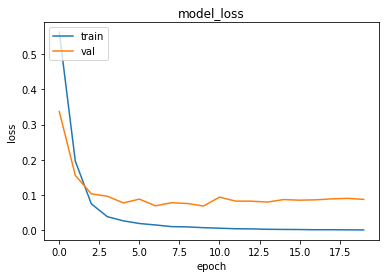

In [ ]:
model.summary()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [ ]:
model.evaluate(
    x = test_x,
    y = test_y
)

 9/13 [===================>..........] - ETA: 0s - loss: 0.0654 - accuracy: 0.9722

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


13/13 [==============================] - 0s 15ms/step - loss: 0.0869 - accuracy: 0.9756


[0.08693414181470871, 0.97555011510849]